In [79]:
from student_data_handler import StudentDataHandler
config_path='config.yaml'
handler = StudentDataHandler(config_path)
students = handler.get_students(limit=10)  # Get up to 10 student records


Loaded students data from Redis.


In [104]:
students

[{'_id': 0,
  'name': 'aimee Zank',
  'scores': [{'score': 1.463179736705023, 'type': 'exam'},
   {'score': 11.78273309957772, 'type': 'quiz'},
   {'score': 35.8740349954354, 'type': 'homework'}],
  'id': '3ecf'},
 {'_id': 1,
  'name': 'Aurelia Menendez',
  'scores': [{'score': 60.06045071030959, 'type': 'exam'},
   {'score': 52.79790691903873, 'type': 'quiz'},
   {'score': 71.76133439165544, 'type': 'homework'}],
  'id': '52df'},
 {'_id': 2,
  'name': 'Corliss Zuk',
  'scores': [{'score': 67.03077096065002, 'type': 'exam'},
   {'score': 6.301851677835235, 'type': 'quiz'},
   {'score': 66.28344683278382, 'type': 'homework'}],
  'id': 'bab3'},
 {'_id': 3,
  'name': 'Bao Ziglar',
  'scores': [{'score': 71.64343899778332, 'type': 'exam'},
   {'score': 24.80221293650313, 'type': 'quiz'},
   {'score': 42.26147058804812, 'type': 'homework'}],
  'id': '75a9'},
 {'_id': 4,
  'name': 'Zachary Langlais',
  'scores': [{'score': 78.68385091304332, 'type': 'exam'},
   {'score': 90.2963101368042, 't

In [80]:

import matplotlib.pyplot as plt

# MATPLOTLIB CHARTS

In [81]:
id =[student['_id'] for student in students]
names = [student['name'] for student in students][:]
exam_scores = [(student['name'], next(score['score'] for score in student['scores'] if score['type'] == 'exam')) for student in students][:]
quiz_scores = [(student['name'], next(score['score'] for score in student['scores'] if score['type'] == 'quiz')) for student in students][:]
homework_scores = [(student['name'], next(score['score'] for score in student['scores'] if score['type'] == 'homework')) for student in students][:]



Text(0.5, 0, 'Scores')

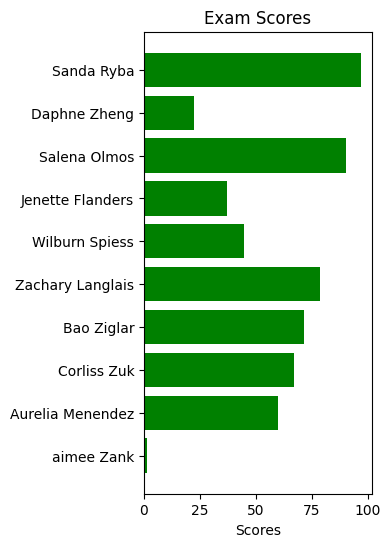

In [82]:
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.barh(*zip(*exam_scores), color='green')
plt.title('Exam Scores')
plt.xlabel('Scores')

Text(0.5, 0, 'Scores')

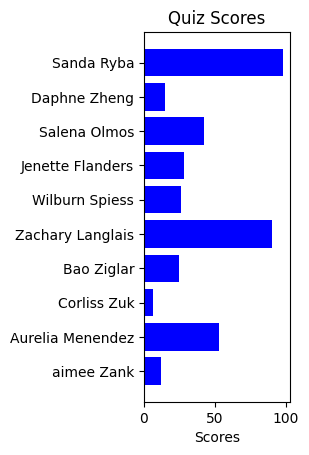

In [83]:
# Plotting Quiz Scores
plt.subplot(132)
plt.barh(*zip(*quiz_scores), color='blue')
plt.title('Quiz Scores')
plt.xlabel('Scores')

Text(0.5, 0, 'Scores')

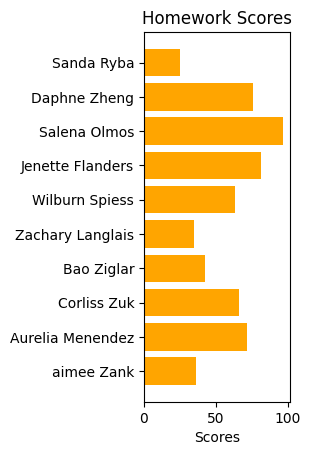

In [84]:
# Plotting Homework Scores
plt.subplot(133)
plt.barh(*zip(*homework_scores), color='orange')
plt.title('Homework Scores')
plt.xlabel('Scores')

In [85]:
total_scores = [(student['name'], sum(score['score'] for score in student['scores'])) for student in students]

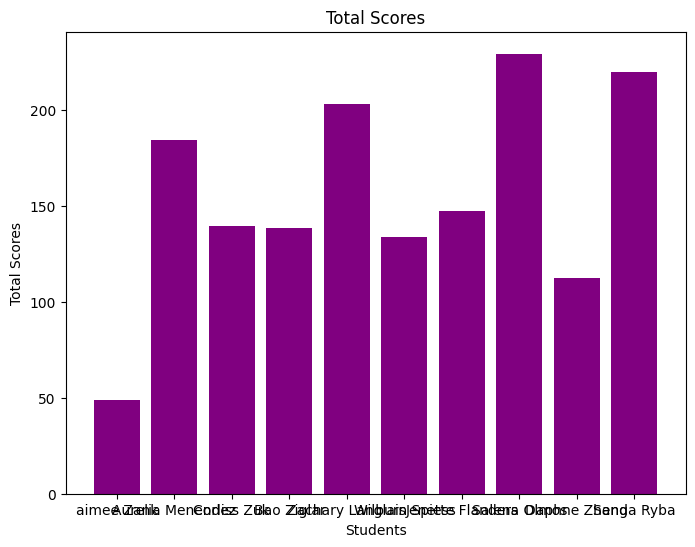

In [86]:
plt.figure(figsize=(8, 6))

# Plotting Total Scores
plt.bar(*zip(*total_scores), color='purple')
plt.title('Total Scores')
plt.xlabel('Students')
plt.ylabel('Total Scores')

plt.show()

# AGGREGATION

In [87]:
import numpy as np

In [88]:
# Extract scores for each type
exam_scores = [score['score'] for student in students for score in student['scores'] if score['type'] == 'exam']
quiz_scores = [score['score'] for student in students for score in student['scores'] if score['type'] == 'quiz']
homework_scores = [score['score'] for student in students for score in student['scores'] if score['type'] == 'homework']

In [89]:
# average exam_score

average_exam = np.mean(exam_scores)
average_exam

57.05956109687099

In [90]:
#average quiz score
average_quiz = np.mean(quiz_scores)
average_quiz


39.49633180938845

In [91]:
# average homework score
average_homework = np.mean(homework_scores)

average_homework

59.33353083977274

In [92]:
max_scores = [np.max(scores) for scores in zip(exam_scores, quiz_scores, homework_scores)]
max_scores

[35.8740349954354,
 71.76133439165544,
 67.03077096065002,
 71.64343899778332,
 90.2963101368042,
 63.42288310628662,
 81.57115318686338,
 96.52986171633331,
 75.94123677556644,
 97.80449632538915]

In [93]:
min_exam_score = np.min(exam_scores)
max_exam_score = np.max(exam_scores)
print(min_exam_score, max_exam_score)

1.463179736705023 97.00509953654694


In [94]:
min_quiz_score = np.min(quiz_scores)
max_quiz_score = np.max(quiz_scores)
print(min_quiz_score, max_quiz_score)

6.301851677835235 97.80449632538915


In [95]:
min_hw_score = np.min(homework_scores)
max_hw_score = np.max(homework_scores)
print(min_hw_score, max_hw_score)

25.27368532432955 96.52986171633331


In [96]:
# Calculate mean and standard deviation
mean_exam = np.mean(exam_scores)
mean_quiz = np.mean(quiz_scores)
mean_homework = np.mean(homework_scores)

std_exam = np.std(exam_scores)
std_quiz = np.std(quiz_scores)
std_homework = np.std(homework_scores)


print(f"Mean Exam Score: {mean_exam}, Standard Deviation: {std_exam}")
print(f"Mean Quiz Score: {mean_quiz}, Standard Deviation: {std_quiz}")
print(f"Mean Homework Score: {mean_homework}, Standard Deviation: {std_homework}")


Mean Exam Score: 57.05956109687099, Standard Deviation: 28.884621381966987
Mean Quiz Score: 39.49633180938845, Standard Deviation: 30.305930122008274
Mean Homework Score: 59.33353083977274, Standard Deviation: 22.351999408600985


# Search Operations

In [97]:
# Assuming 'students' is a list of dictionaries and each 'student' has a 'scores' list
score_threshold = 90
for student in students:
    # Using 'any()' to check if any score is above the threshold
    if any(score.get('score', 0) > score_threshold for score in student.get('scores', [])):
        print(student['name'])


Zachary Langlais
Salena Olmos
Sanda Ryba


In [98]:
# Print students with a total score above a certain threshold:

total_score_threshold = 180
for student in students:
    total_score = sum(score['score'] for score in student['scores'])
    if total_score > total_score_threshold:
        print(student['name'])

Aurelia Menendez
Zachary Langlais
Salena Olmos
Sanda Ryba


In [99]:
specific_homework_score = 81.57115318686338

# Loop through each student and their scores
for student in students:
    # Filter for homework scores and check if any match the specific score
    if any(score['score'] == specific_homework_score and score['type'] == 'homework' for score in student['scores']):
        print(student['name'])

Jenette Flanders


In [100]:
# Print students who have at least one perfect score in any type:
for student in students:
    if any(score['score'] == 100 for score in student['scores']):
        print(student['name'])
else:
    print("None")


None


In [101]:
# Print students who have a failing exam score (below 23):
for student in students:
    if any(score < 23 for score in exam_scores):
        print(student['name'])

aimee Zank
Aurelia Menendez
Corliss Zuk
Bao Ziglar
Zachary Langlais
Wilburn Spiess
Jenette Flanders
Salena Olmos
Daphne Zheng
Sanda Ryba


In [102]:
# Print students with the highest total score:
highest_total_score = max(sum(score['score'] for score in student['scores']) for student in students)
for student in students:
    total_score = sum(score['score'] for score in student['scores'])
    if total_score == highest_total_score:
        print(student['name'])

Salena Olmos


In [103]:
# search a string in name
search_term = "je"

matching_names = [student['name'] for student in students if search_term.lower() in student['name'].lower()]

if matching_names:
    print(f"Students with '{search_term}' in their names:")
    for name in matching_names:
        print(name)
else:
    print(f"No students found with '{search_term}' in their names.")

Students with 'je' in their names:
Jenette Flanders
